# Proyecto 03 - Procesamiento del Lenguaje Natural

## Dataset: The Multilingual Amazon Reviews Corpus

**Recuerda descargar el dataset de [aquí](https://github.com/kang205/SASRec). Es un archivo .zip que contiene tres documentos. Más información sobre el dataset [aquí](https://registry.opendata.aws/amazon-reviews-ml/). Es importante que tengas en cuenta la [licencia](https://docs.opendata.aws/amazon-reviews-ml/license.txt) de este dataset.**

### Exploración de datos y Procesamiento del Lenguaje Natural

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Considera que hasta que no hayas aplicado las herramientas de Procesamiento del Lenguaje Natural vistas, será difícil completar este análisis. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿qué palabras están asociadas a calificaciones positivas y qué palabras a calificaciones negativas?

### Machine Learning

Implementa un modelo que, dada la crítica de un producto, asigne la cantidad de estrellas correspondiente. **Para pensar**: ¿es un problema de Clasificación o de Regresión?

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada sus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo.
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?

**Recomendación:** si no te resulta conveniente trabajar en español con NLTK, te recomendamos que explores la librería [spaCy](https://spacy.io/).

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Valdrá la pena convertir el problema de Machine Learning en un problema binario? Es decir, asignar únicamente las etiquetas Positiva y Negativa a cada crítica y hacer un modelo que, en lugar de predecir las estrellas, prediga esa etiqueta. Pensar en qué situación puede ser útil. ¿Esperas que el desempeño sea mejor o peor?

# FLUJO DE TRABAJO

# 1 - Obtencion de datos

In [4]:
#descargamos las librerias que vamos a usar y las configuraciones
import pandas as pd
import numpy as np
import string

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import nltk
import itertools
from nltk.tokenize import sent_tokenize, word_tokenize

#Esto sirve para configurar NLTK. La primera vez puede tardar un poco
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Luigi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Luigi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
dataset = pd.read_json(r'C:\Users\Luigi\Documents\02.Proj_Amazon-NLP\dataset_es_dev.json',lines=True)
#probar los otros dos dataset train y test. 

# 2 - Exploracion de datos

In [3]:
dataset.head()

review_id          product_id          reviewer_id  stars  \
0  es_0417480  product_es_0873923  reviewer_es_0672978      1   
1  es_0180432  product_es_0713146  reviewer_es_0100858      1   
2  es_0144850  product_es_0356874  reviewer_es_0486447      1   
3  es_0339629  product_es_0939832  reviewer_es_0894703      1   
4  es_0858362  product_es_0489066  reviewer_es_0887663      1   

                                         review_body  \
0  Malisimo, muy grande demasiado aparatoso y mal...   
1          No he recibido el pedido no la devolución   
2  Tengo que buscar otro sistema, este no funcion...   
3  Utilicé las brocas de menor diámetro y se me d...   
4         No me gusta su olor a viejo y aspecto malo   

                         review_title language  product_category  
0                         Mala compra       es          wireless  
1                   No lo he recibido       es           apparel  
2  Que no aprieta bien en el manillar       es            sports  
3               Brocas de mantequilla       es  home_improvement  
4                         No me gusta       es            beauty

<AxesSubplot:xlabel='count', ylabel='product_category'>

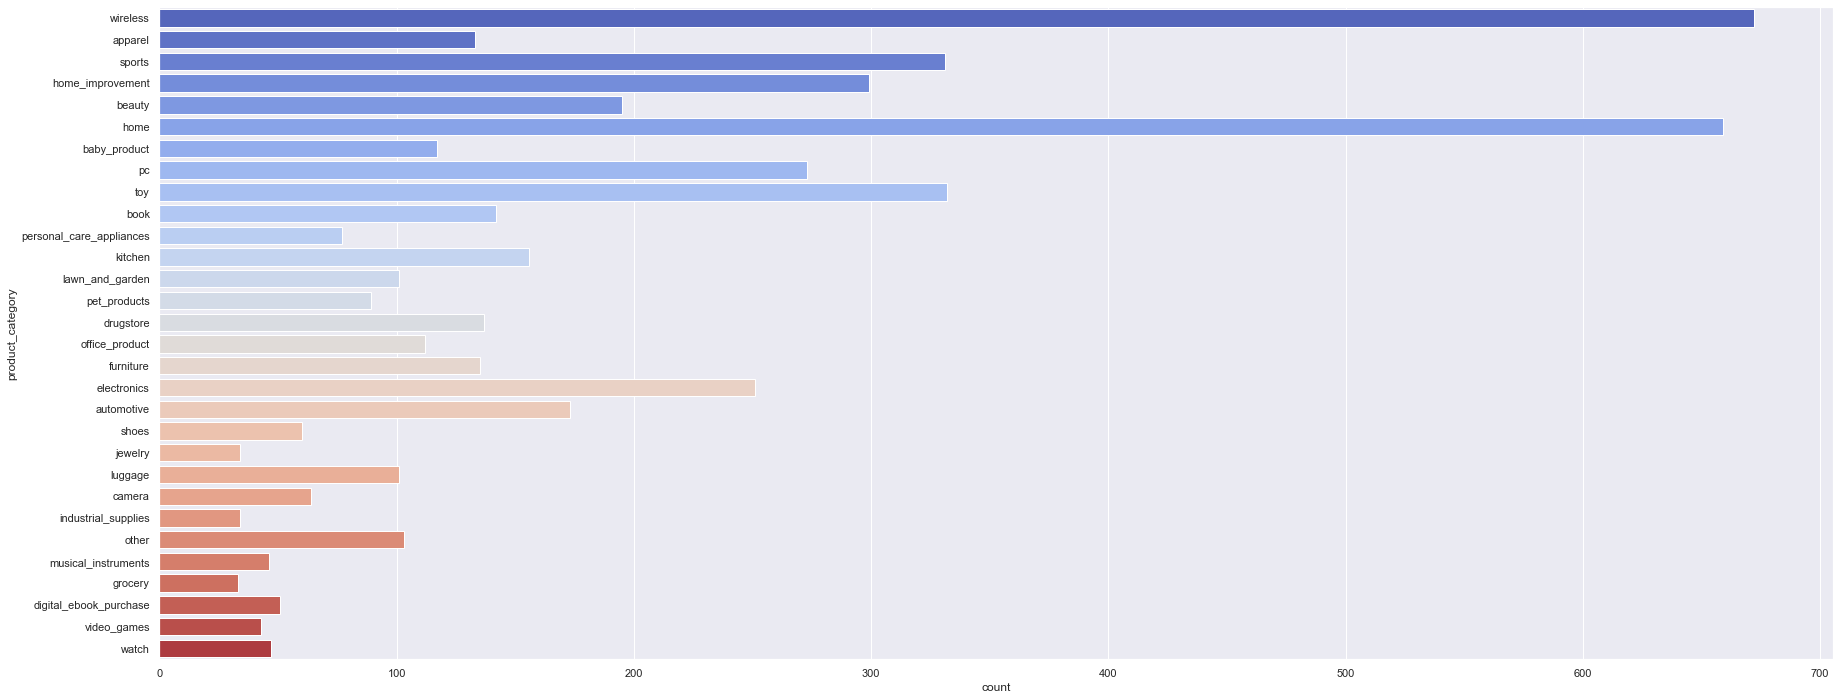

In [4]:
plt.figure(figsize=(30,12))
sns.countplot(data = dataset, y = "product_category", palette="coolwarm")

In [5]:
dataset.shape

(5000, 8)

In [6]:
dataset.dtypes

review_id           object
product_id          object
reviewer_id         object
stars                int64
review_body         object
review_title        object
language            object
product_category    object
dtype: object

In [7]:
dataset.count()

review_id           5000
product_id          5000
reviewer_id         5000
stars               5000
review_body         5000
review_title        5000
language            5000
product_category    5000
dtype: int64

Con esto nos damos cuenta de que los datos tienen 8 columnas y 5000 filas. Ademas, por el nombre de las cabeceras nos damos cuenta que muy posiblemente este dataset este estructurado mediante SQL. Vemos que hay tres IDs asociados: uno correspondiente a la review, otro relacionado al producto y otro a la critica. Tambien podemos ver que en esta tabla nos indica el lenguaje (importante para ver que tipos de librerias usamos) y ademas vemmos que los productos tienen una categoria asociada. Por ultimo vemos la cantidad de estrellas que se dio a ese producto dada la review.

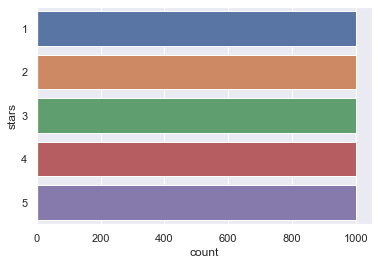

In [8]:
sns.countplot(data = dataset , y='stars')
plt.show()

Con esto vemos que de un total de 5000 registros, estos tienen una distribucion equiprobable segun su clasificacion. Ahora veamos un comentario random del dataset y como expresan los usuarios sus gustos..

In [9]:
index_random = np.random.randint(1,4000)
titular = dataset.review_body.iloc[index_random]
print(index_random, titular)
print(index_random, dataset.stars.iloc[index_random])

3749 Es lo que esperaba,el pedido vino a tiempo
3749 4


A continuacion vemos algunos registros y como estos tienen asociado el titulo del review

In [10]:
dataset2 = dataset.iloc[:,[4,5,3]]
#dataset2.dropna(axis=0,inplace=True)  # Si hay alguna nan, tiramos esa instancia
dataset2.head()

review_body  \
0  Malisimo, muy grande demasiado aparatoso y mal...   
1          No he recibido el pedido no la devolución   
2  Tengo que buscar otro sistema, este no funcion...   
3  Utilicé las brocas de menor diámetro y se me d...   
4         No me gusta su olor a viejo y aspecto malo   

                         review_title  stars  
0                         Mala compra      1  
1                   No lo he recibido      1  
2  Que no aprieta bien en el manillar      1  
3               Brocas de mantequilla      1  
4                         No me gusta      1

In [11]:
data_concat = dataset2.review_title + " " +dataset2.review_body
data_concat
dataset["Todojunto"] = data_concat
dataset

review_id          product_id          reviewer_id  stars  \
0     es_0417480  product_es_0873923  reviewer_es_0672978      1   
1     es_0180432  product_es_0713146  reviewer_es_0100858      1   
2     es_0144850  product_es_0356874  reviewer_es_0486447      1   
3     es_0339629  product_es_0939832  reviewer_es_0894703      1   
4     es_0858362  product_es_0489066  reviewer_es_0887663      1   
...          ...                 ...                  ...    ...   
4995  es_0179515  product_es_0158275  reviewer_es_0273644      5   
4996  es_0894902  product_es_0953259  reviewer_es_0153773      5   
4997  es_0760496  product_es_0731995  reviewer_es_0171091      5   
4998  es_0178380  product_es_0402051  reviewer_es_0686937      5   
4999  es_0810087  product_es_0684221  reviewer_es_0613091      5   

                                            review_body  \
0     Malisimo, muy grande demasiado aparatoso y mal...   
1             No he recibido el pedido no la devolución   
2     Tengo que buscar otro sistema, este no funcion...   
3     Utilicé las brocas de menor diámetro y se me d...   
4            No me gusta su olor a viejo y aspecto malo   
...                                                 ...   
4995  Me ha encantado la cesta. Ha llegado impecable...   
4996                 Desempeña su función correctamente   
4997  Me ha encantado la diadema! Las flores son tal...   
4998  A mi me gustan mucho las fundas TPU, ya que so...   
4999  El artículo ha cumplido con las expectativas q...   

                            review_title language  product_category  \
0                            Mala compra       es          wireless   
1                      No lo he recibido       es           apparel   
2     Que no aprieta bien en el manillar       es            sports   
3                  Brocas de mantequilla       es  home_improvement   
4                            No me gusta       es            beauty   
...                                  ...      ...               ...   
4995                           guadalupe       es              home   
4996                      calidad precio       es            camera   
4997                           Excelente       es               toy   
4998                              Genial       es          wireless   
4999                       Buena calidad       es           apparel   

                                              Todojunto  
0     Mala compra Malisimo, muy grande demasiado apa...  
1     No lo he recibido No he recibido el pedido no ...  
2     Que no aprieta bien en el manillar Tengo que b...  
3     Brocas de mantequilla Utilicé las brocas de me...  
4     No me gusta No me gusta su olor a viejo y aspe...  
...                                                 ...  
4995  guadalupe Me ha encantado la cesta. Ha llegado...  
4996  calidad precio Desempeña su función correctamente  
4997  Excelente Me ha encantado la diadema! Las flor...  
4998  Genial A mi me gustan mucho las fundas TPU, ya...  
4999  Buena calidad El artículo ha cumplido con las ...  

[5000 rows x 9 columns]

# 3 - Normalizacion

En esta etapa limpiaremos los caracteres, tokenizaremos y llevaremos a raiz las palabras del dataset mediante la stematizacion o lemmatizacion.

Comenzaremos desasiendonos de las palabras que tienen menos carga semantica para trabajar con los que tienen mayor ponderacion. Para ello traeremos el catalogo predefinido como stopword de la libreria NLTK

In [12]:
stopwords = nltk.corpus.stopwords.words('spanish')
stopwords = [palabra for palabra in stopwords if 'not' not in palabra]
#stopwords
print(stopwords)

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

## 3.1 - Stemmer

In [13]:
# Importamos esta libreria que nos permite reemplzar caracteres
import re

# Importamos la función que nos permite Stemmizar de nltk y definimos el stemmer
from nltk.stem import SnowballStemmer
# spanish_stemmer = SnowballStemmer('spanish')
# (spanish_stemmer.stem("texto_en_str"))
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()


In [14]:
# Recorremos todos los titulos y le vamos aplicando la Normalizacion y luega el Stemming a cada uno
review_list=[]
simb=["!",".",",","no","si","...",")","("]
todaslaspalabras=[]
for review in dataset.Todojunto:
    # Vamos a reemplzar los caracteres que no sean leras por espacios
    #review=re.sub(","," ",str(review))#borra los espacios y las tiles
    # Pasamos todo a minúsculas
    review=review.lower()
    # Tokenizamos para separar las palabras del titular
    review=nltk.word_tokenize(review)
    # Eliminamos las palabras de menos de 3 letras
    #dataset = [palabra for palabra in dataset if len(palabra)>2]
    # Sacamos las Stopwords
    review = [palabra for palabra in review if not palabra in stopwords if not palabra in simb]
    
    ## Hasta acá Normalizamos, ahora a stemmizar
    
    # Aplicamos la funcion para buscar la raiz de las palabras
    review=[stemmer.stem(palabra) for palabra in review]

    todaslaspalabras.append(review)
    # Por ultimo volvemos a unir el titular
    review=" ".join(review)
    
    # Vamos armando una lista con todos los titulares
    review_list.append(review)
    #dataset["titular_normalizado"] = titular_list

In [15]:
flat_list = [item for t in todaslaspalabras for item in t]
flat_list[0:30]

['mala',
 'compra',
 'malisimo',
 'grand',
 'demasiado',
 'aparatoso',
 'mal',
 'protector',
 'pantalla',
 'recibido',
 'recibido',
 'pedido',
 'devolución',
 'aprieta',
 'bien',
 'manillar',
 'buscar',
 'sistema',
 'funciona',
 'bien',
 'abrazadera',
 'lleva',
 'agarrar',
 'manillar',
 'aprieta',
 'bien',
 'deslizando',
 'linterna',
 'hacia',
 'abajo']

In [16]:
review_list[0:10] #Porque tengo que correr todo de nuevo??????

['mala compra malisimo grand demasiado aparatoso mal protector pantalla',
 'recibido recibido pedido devolución',
 'aprieta bien manillar buscar sistema funciona bien abrazadera lleva agarrar manillar aprieta bien deslizando linterna hacia abajo',
 'broca mantequilla utilicé broca menor diámetro doblaron varia mantequilla hacer mínima presión vez doblada intentar enderezarla parten exteriorment amarilla interior fundido gri peor compra hecho bastant tiempo',
 'gusta gusta olor viejo aspecto malo',
 'bola rota hola despué recog paquet llegado bola rota',
 'part poder elegir color part poder elegir color envian cesto color asa imagino aprovechando van rompiendo dicen color aleatorio foto cesta asa mismo color recomiendo comprarlo pueda elegir color único alivio romperá pronto calidad allá',
 'tapa pantalla baja calidad ahí precio compra supon tirar dinero',
 'recibido producto producto sale entregado recibido',
 'patata recomiendo pega acaba despegandos']

In [17]:
freq = nltk.FreqDist(flat_list)
freq

FreqDist({'bien': 1632, 'calidad': 1102, 'producto': 833, 'buena': 754, 'precio': 721, 'buen': 460, 'funciona': 364, 'bastant': 360, 'perfecto': 336, 'mejor': 314, ...})

In [18]:
dataset["review_stem"] = review_list
dataset.tail()

review_id          product_id          reviewer_id  stars  \
4995  es_0179515  product_es_0158275  reviewer_es_0273644      5   
4996  es_0894902  product_es_0953259  reviewer_es_0153773      5   
4997  es_0760496  product_es_0731995  reviewer_es_0171091      5   
4998  es_0178380  product_es_0402051  reviewer_es_0686937      5   
4999  es_0810087  product_es_0684221  reviewer_es_0613091      5   

                                            review_body    review_title  \
4995  Me ha encantado la cesta. Ha llegado impecable...       guadalupe   
4996                 Desempeña su función correctamente  calidad precio   
4997  Me ha encantado la diadema! Las flores son tal...       Excelente   
4998  A mi me gustan mucho las fundas TPU, ya que so...          Genial   
4999  El artículo ha cumplido con las expectativas q...   Buena calidad   

     language product_category  \
4995       es             home   
4996       es           camera   
4997       es              toy   
4998       es         wireless   
4999       es          apparel   

                                              Todojunto  \
4995  guadalupe Me ha encantado la cesta. Ha llegado...   
4996  calidad precio Desempeña su función correctamente   
4997  Excelente Me ha encantado la diadema! Las flor...   
4998  Genial A mi me gustan mucho las fundas TPU, ya...   
4999  Buena calidad El artículo ha cumplido con las ...   

                                            review_stem  
4995  guadalup encantado cesta llegado impecable.tie...  
4996      calidad precio desempeña función correctament  
4997  excelent encantado diadema flore tal vienen im...  
4998  genial gustan funda tpu funda normalment fina ...  
4999  buena calidad artículo cumplido expectativa de...

In [19]:
#print(review_list)

In [20]:
df_freq = pd.DataFrame(list(freq.items()), columns = ["Word", "frecuency"])
df_freq.sort_values('frecuency',ascending=False, inplace = True)
df_freq.head(10)

Word  frecuency
13        bien       1632
84     calidad       1102
93    producto        833
596      buena        754
89      precio        721
1277      buen        460
17    funciona        364
47     bastant        360
1627  perfecto        336
517      mejor        314

In [21]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [22]:
import re, string

def remove_punctuation ( flat_list ):
  return re.sub('[%s]' % re.escape(string.punctuation), ' ', text)

df_freq = pd.DataFrame(list(freq.items()), columns = ["Word", "Frecuency"])
df_freq.sort_values('Frecuency',ascending=False, inplace = True)
df_freq.head()

Word  Frecuency
13       bien       1632
84    calidad       1102
93   producto        833
596     buena        754
89     precio        721

In [23]:
Good = list(itertools.chain(*freq))
Good[0:10]

['b', 'i', 'e', 'n', 'c', 'a', 'l', 'i', 'd', 'a']

In [24]:
print(nltk.word_tokenize(review))

['buena', 'calidad', 'artículo', 'cumplido', 'expectativa', 'deseaba']


Falta distribucion de frecuencia de palabras con seaborn.
Ver la frecuencia de palabras ahora segmentado por rubro

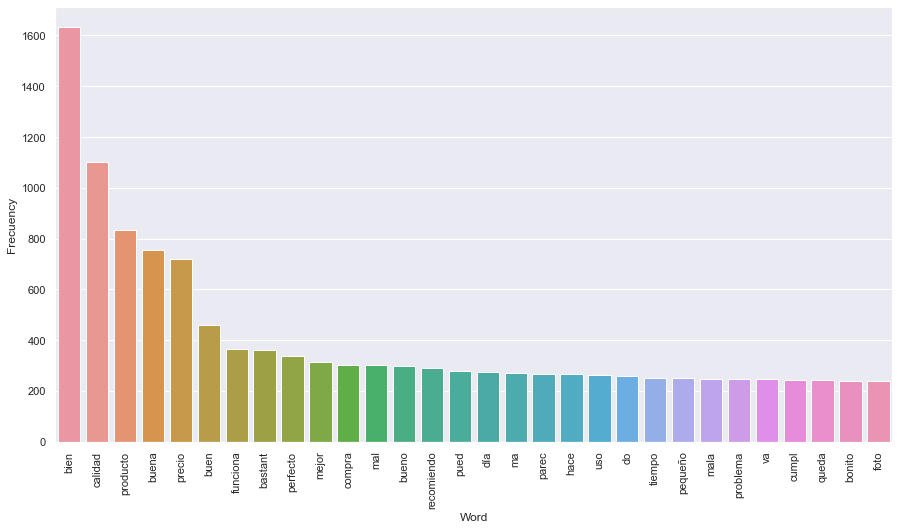

In [25]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_freq.iloc[:30].Word, y = df_freq.iloc[:30].Frecuency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

# 4 - Vectorizacion

In [26]:
dataset["review_stem"] = review_list
dataset.tail()

review_id          product_id          reviewer_id  stars  \
4995  es_0179515  product_es_0158275  reviewer_es_0273644      5   
4996  es_0894902  product_es_0953259  reviewer_es_0153773      5   
4997  es_0760496  product_es_0731995  reviewer_es_0171091      5   
4998  es_0178380  product_es_0402051  reviewer_es_0686937      5   
4999  es_0810087  product_es_0684221  reviewer_es_0613091      5   

                                            review_body    review_title  \
4995  Me ha encantado la cesta. Ha llegado impecable...       guadalupe   
4996                 Desempeña su función correctamente  calidad precio   
4997  Me ha encantado la diadema! Las flores son tal...       Excelente   
4998  A mi me gustan mucho las fundas TPU, ya que so...          Genial   
4999  El artículo ha cumplido con las expectativas q...   Buena calidad   

     language product_category  \
4995       es             home   
4996       es           camera   
4997       es              toy   
4998       es         wireless   
4999       es          apparel   

                                              Todojunto  \
4995  guadalupe Me ha encantado la cesta. Ha llegado...   
4996  calidad precio Desempeña su función correctamente   
4997  Excelente Me ha encantado la diadema! Las flor...   
4998  Genial A mi me gustan mucho las fundas TPU, ya...   
4999  Buena calidad El artículo ha cumplido con las ...   

                                            review_stem  
4995  guadalup encantado cesta llegado impecable.tie...  
4996      calidad precio desempeña función correctament  
4997  excelent encantado diadema flore tal vienen im...  
4998  genial gustan funda tpu funda normalment fina ...  
4999  buena calidad artículo cumplido expectativa de...

In [27]:
dataset.tail()
list_review_stem = list(dataset['review_stem'].values)
Calification = dataset['stars'].values

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

# Usaremos solo las 10000 palabras con mas frecuencia en todo el corpus para generar los vectores
max_features=10000

# Es decir que cada instancia tendrá 1000 features
cou_vec=CountVectorizer(max_features=max_features) # stop_words="english" , ngram_range=(1, 2)

In [29]:
matriz_reviews = cou_vec.fit_transform(list_review_stem)

# Tomamos las palabras
all_words = cou_vec.get_feature_names()

# Vizualizamos las 50 palabras mas usadas
print("50 palabras mas usadas: ",all_words[0:50])

50 palabras mas usadas:  ['10', '100', '1000', '100x100', '1080', '10cm', '10mm', '11', '12', '125', '12m', '12v', '12º', '13', '130', '135', '14', '15', '150', '150w', '150x190', '15h', '15min', '16', '160', '16gb', '17', '18', '180', '180gr', '18kg', '18º', '19', '1978', '1a', '1er', '1h', '1º', '20', '200', '2000', '20000', '2001', '2006', '2007', '200w', '2011', '2017', '2018', '2019']


# 5 - Modelado

In [2]:
#ver funcioens de sklear para guardar el modelo y ahorrar tiempo. pickle

In [30]:
x = matriz_reviews.toarray()
y = Calification

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [31]:
matriz_reviews.shape

(5000, 10000)

In [32]:
len(Calification)

5000

In [33]:
len(ytrain)

4000

# Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(n_estimators = 200, random_state=42, max_depth=5)
rf.fit(xtrain,ytrain)
print("acc: ",rf.score(xtest,ytest))

acc:  0.419


In [35]:
print("acc: ",rf.score(xtrain,ytrain))

acc:  0.56975


In [36]:
xtrain.shape

(4000, 10000)

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def confusion(ytest,y_pred):
    names=["1","2","3","4","5"]
    cm=confusion_matrix(ytest,y_pred)
    f,ax=plt.subplots(figsize=(7,7))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

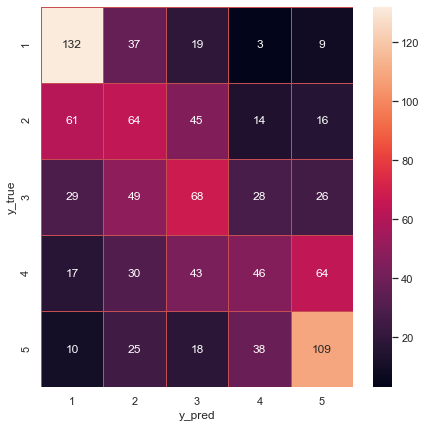

In [38]:
y_pred=rf.predict(xtest)
confusion(ytest,y_pred)

## Utilizamos rf porque nb de gauss arrobaja peores resultados. El modelo hace mejor match con las bajas calificaciones que con las altas. Sesgo positivo en general. Problema para analizar las calificaciones positivas.


C:\Users\Luigi\anaconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:949: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scout = self.ax.fill_between([], [], **plot_kws)
C:\Users\Luigi\anaconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:992: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  artist = ax.fill_between(
C:\Users\Luigi\anaconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:949: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scout = self.ax.fill_between([], [], **plot_kws)
C:\Users\Luigi\anaconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:992: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed

Text(0, 0.5, 'Probability Density')

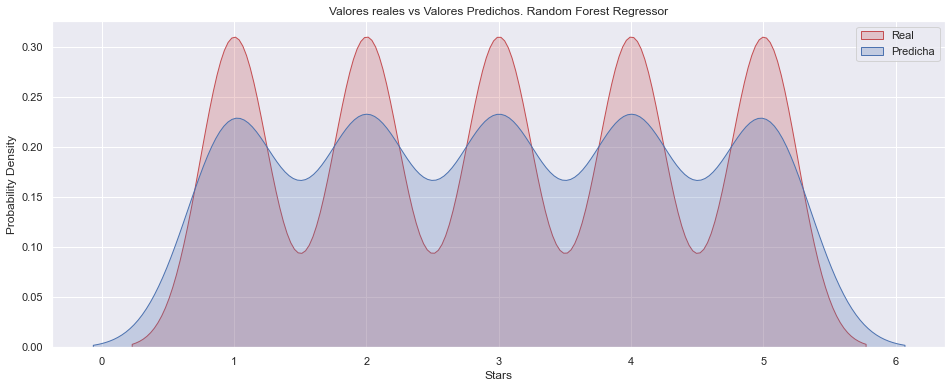

In [39]:
plt.figure(figsize = (16,6))
sns.kdeplot(y, color='r', shade=True, Label='Real')
  
sns.kdeplot(ytest, color='b', shade=True, Label='Predicha')


plt.legend()  
plt.title("Valores reales vs Valores Predichos. Random Forest Regressor")
plt.xlabel('Stars')
plt.ylabel('Probability Density')

#analizar si sirve el grraph

# Random Forest Reggresor

In [40]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import sklearn.metrics as metrics
#explorar 10 palabras mas importantes. Aclarar la opcion de regresor elegida. 

In [41]:
clf_tree = RandomForestRegressor(n_estimators=1500, max_features=5000,n_jobs=-1, random_state = 0)
clf_tree.fit(xtrain,ytrain)


RandomForestRegressor(max_features=5000, n_estimators=1500, n_jobs=-1,
                      random_state=0)

In [42]:
y_train_pred_clf = clf_tree.predict(xtrain)
y_test_pred_clf = clf_tree.predict(xtest)


In [43]:
print('RMSE para Train', np.sqrt(metrics.mean_squared_error(ytrain, y_train_pred_clf)))
print('RMSE para Test', np.sqrt(metrics.mean_squared_error(ytest, y_test_pred_clf)))


RMSE para Train 0.40746564217803144
RMSE para Test 1.1273681683953611


In [44]:
comparacion_tree_reg = pd.DataFrame({'Real Values':ytest, 'Predicted Values':y_test_pred_clf})
comparacion_tree_reg

Real Values  Predicted Values
0              2          1.313333
1              4          3.526000
2              1          1.727333
3              3          3.439333
4              3          2.900000
..           ...               ...
995            2          4.225333
996            1          3.706667
997            1          1.646667
998            3          1.485333
999            4          1.866667

[1000 rows x 2 columns]